In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pip install pandas-ta
import pandas_ta as ta

load data

In [2]:
filename = '/Users/matteoprandi/Documents/QF UniBo/Advanced Topics in Artificial Intelligence/AI_project25/data.xlsx'
data = pd.read_excel(filename)
data.columns = data.iloc[2,:].values
data = data.iloc[3:,]
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

df = data.loc[:,['SPX', 'SX5E', 'GOVIES EUR', 'GOVIES US', 'GOLD', 'WTI']]
df

,SPX,SX5E,GOVIES EUR,GOVIES US,GOLD,WTI
date,,,,,,
2004-07-21,1093.88,2728.91,151.274,961.263,425.6,88.69
2004-07-22,1096.85,2680.44,151.541,962.438,423.7,89.47
2004-07-23,1086.2,2673.44,151.497,963.611,419,89.82
2004-07-26,1084.07,2640.61,151.4,962.122,418.8,89.55
2004-07-27,1094.83,2670.48,151.299,956.719,415.5,89.95
...,...,...,...,...,...,...
2025-01-24,6101.24,5219.37,236.065,1655.19,2778,74.66
2025-01-27,6012.28,5188.45,236.426,1664.175,2738.2,73.17
2025-01-28,6067.7,5195.71,236.346,1663.619,2767.5,73.77


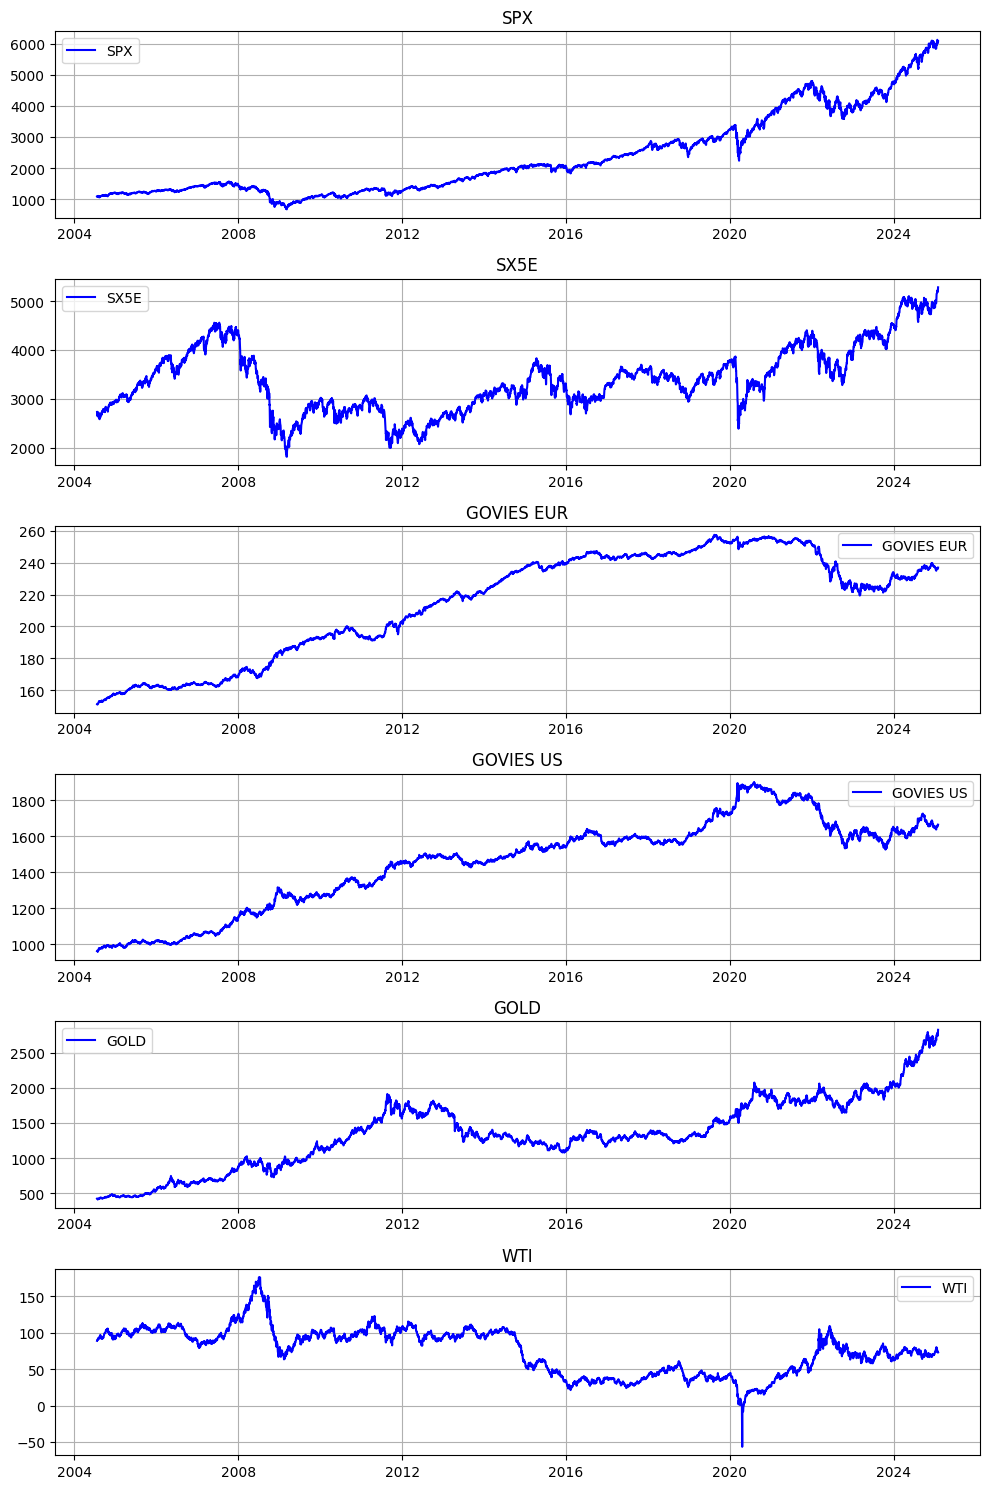

In [3]:
# Imposta il numero di subplot in base al numero di colonne
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 15))

# Loop per creare un grafico per ogni colonna
for i, col in enumerate(df.columns):
    axes[i].plot(df.index, df[col], label=col, color='b')
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

features

In [4]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [5]:
df = df.pct_change()
df

,SPX,SX5E,GOVIES EUR,GOVIES US,GOLD,WTI
date,,,,,,
2004-07-21,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-22,0.002715,-0.017762,0.001765,0.001222,-0.004464,0.008795
2004-07-23,-0.009710,-0.002612,-0.000290,0.001219,-0.011093,0.003912
2004-07-26,-0.001961,-0.012280,-0.000640,-0.001545,-0.000477,-0.003006
2004-07-27,0.009926,0.011312,-0.000667,-0.005616,-0.007880,0.004467
...,...,...,...,...,...,...
2025-01-24,-0.002855,0.000358,-0.001087,0.001644,0.005138,0.000536
2025-01-27,-0.014581,-0.005924,0.001529,0.005428,-0.014327,-0.019957
2025-01-28,0.009218,0.001399,-0.000338,-0.000334,0.010700,0.008200


In [6]:
# Considero un ribilanciamento bisettimanale
window = 10  
features = pd.DataFrame()

for col in df.columns:
    features[f'{col}_rsi'] = ta.rsi(df[col], length=window)  # RSI
    features[f'{col}_roc'] = ta.roc(df[col], length=window)  # Rate of Change
    features[f'{col}_mom'] = ta.mom(df[col], length=window)  # Momentum
    features[f'{col}_ema50'] = ta.ema(df[col], length=50)  # EMA 50
    features[f'{col}_ema200'] = ta.ema(df[col], length=200)  # EMA 200
    features[f'{col}_zscore'] = ta.zscore(df[col], length=30)  # Z-Score
    features[f'{col}_mad'] = ta.mad(df[col], length=window)  # Mean Absolute Deviation
    features[f'{col}_kurtosis'] = ta.kurtosis(df[col], length=window)  # Kurtosis
    features[f'{col}_skew'] = ta.skew(df[col], length=window)  # Skewness

features


,SPX_rsi,SPX_roc,SPX_mom,SPX_ema50,SPX_ema200,SPX_zscore,SPX_mad,SPX_kurtosis,SPX_skew,SX5E_rsi,...,GOLD_skew,WTI_rsi,WTI_roc,WTI_mom,WTI_ema50,WTI_ema200,WTI_zscore,WTI_mad,WTI_kurtosis,WTI_skew
date,,,,,,,,,,,,,,,,,,,,,
2004-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,46.878267,-81.473905,0.012556,0.001053,0.000857,-0.335374,0.005077,0.808063,0.959501,47.652492,...,-0.551619,50.268245,-98.505940,-0.035343,0.001260,0.000613,-0.094152,0.014371,0.225317,1.058204
2025-01-27,40.837234,-1025.511850,-0.016156,0.000440,0.000704,-1.455024,0.006693,1.079727,-0.326459,43.254971,...,-0.743294,44.979892,-167.863143,-0.049365,0.000428,0.000408,-1.418116,0.011410,3.853971,1.719179
2025-01-28,54.159187,704.142212,0.008072,0.000785,0.000788,0.912635,0.006965,0.958634,-0.596577,49.313281,...,-0.913989,52.593680,-148.927156,0.024960,0.000732,0.000486,0.404680,0.012082,2.053732,1.203459
